In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv('relig_iso.csv')

In [66]:
df.head(10)

,Unnamed: 0,iso,country,gdp_pc,gpi_rank,gpi_score,percentage_non_religious
0,0,AFG,Afghanistan,900,157,3.252,0.00
1,1,AGO,Angola,8200,95,2.105,0.30
2,2,ALB,Albania,8000,66,1.927,8.50
3,3,ARE,United Arab Emirates,49600,46,1.785,0.00
4,4,ARG,Argentina,14700,44,1.763,1.19
5,5,ARM,Armenia,5700,115,2.238,0.00
6,6,AUS,Australia,41000,22,1.494,19.00
7,7,AUT,Austria,40400,6,1.328,30.20
8,8,AZE,Azerbaijan,10900,132,2.360,0.00
9,9,BDI,Burundi,300,138,2.524,0.00


In [64]:
df.info

<bound method DataFrame.info of      Unnamed: 0  iso                           country  gdp_pc  gpi_rank  \
0             0  AFG                       Afghanistan     900       157   
1             1  AGO                            Angola    8200        95   
2             2  ALB                           Albania    8000        66   
3             3  ARE              United Arab Emirates   49600        46   
4             4  ARG                         Argentina   14700        44   
5             5  ARM                           Armenia    5700       115   
6             6  AUS                         Australia   41000        22   
7             7  AUT                           Austria   40400         6   
8             8  AZE                        Azerbaijan   10900       132   
9             9  BDI                           Burundi     300       138   
10           10  BEL                           Belgium   37800        11   
11           11  BEN                             Benin  

In [65]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  iso                           country  gdp_pc  gpi_rank  \
0             0  AFG                       Afghanistan     900       157   
1             1  AGO                            Angola    8200        95   
2             2  ALB                           Albania    8000        66   
3             3  ARE              United Arab Emirates   49600        46   
4             4  ARG                         Argentina   14700        44   
5             5  ARM                           Armenia    5700       115   
6             6  AUS                         Australia   41000        22   
7             7  AUT                           Austria   40400         6   
8             8  AZE                        Azerbaijan   10900       132   
9             9  BDI                           Burundi     300       138   
10           10  BEL                           Belgium   37800        11   
11           11  BEN                             Benin

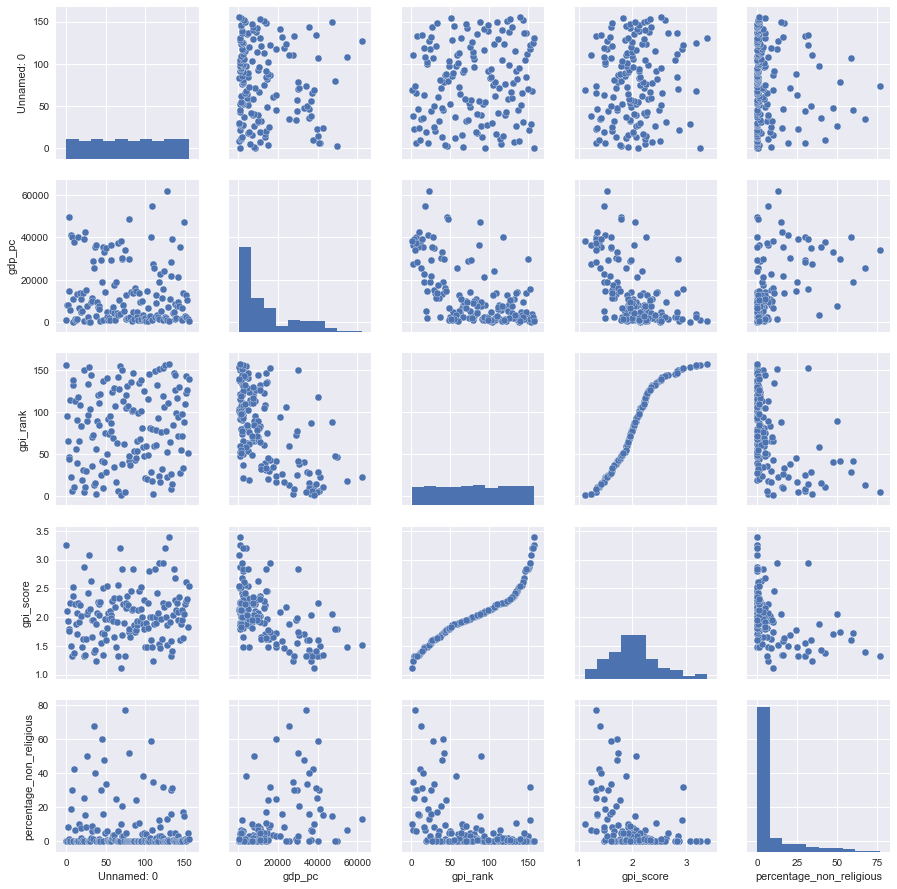

In [15]:
sns.pairplot(df)

In [23]:
np.corrcoef(x=df['gpi_score'],y=df['gdp_pc'])

array([[ 1.       , -0.5523585],
       [-0.5523585,  1.       ]])

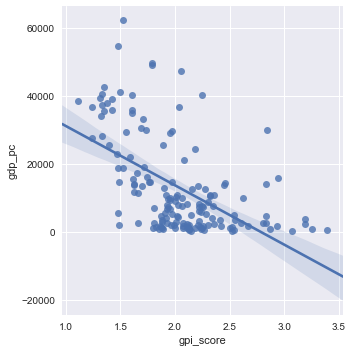

In [35]:
sns.lmplot(x='gpi_score',y='gdp_pc',data=df)

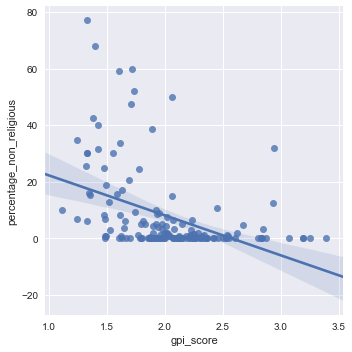

In [36]:
sns.lmplot(x='gpi_score',y='percentage_non_religious',data=df)

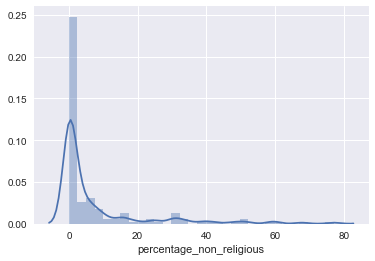

In [68]:
sns.distplot(df['percentage_non_religious'])

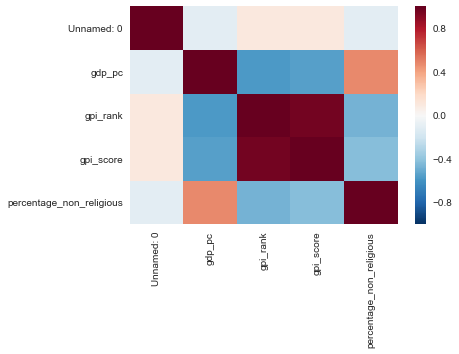

In [67]:
sns.heatmap(df.corr())

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X=df[['gdp_pc','gpi_score']]
y=df[['percentage_non_religious']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print(lm.intercept_)

[ 14.99807919]


In [74]:
predictions = lm.predict(X_test)

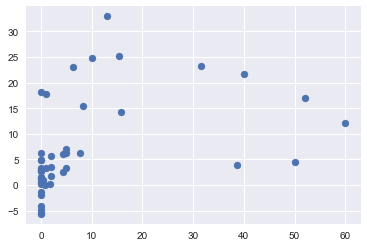

In [75]:
plt.scatter(y_test,predictions)

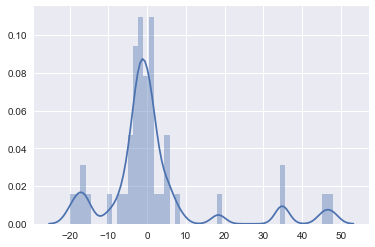

In [76]:
sns.distplot((y_test-predictions),bins=50);

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.97418850957
MSE: 194.682923583
RMSE: 13.9528822679
